In [4]:
library(tidyverse)
ggplot2::theme_set(theme_bw())
library(ggforce)

In [196]:
data.frame(Titanic) %>% head

,Class,Sex,Age,Survived,Freq
,<fct>,<fct>,<fct>,<fct>,<dbl>
1,1st,Male,Child,No,0
2,2nd,Male,Child,No,0
3,3rd,Male,Child,No,35
4,Crew,Male,Child,No,0
5,1st,Female,Child,No,0
6,2nd,Female,Child,No,0


In [197]:
data.frame(Titanic) %>% gather_set_data(1:4, ) %>% tail

,Class,Sex,Age,Survived,Freq,id,x,y
,<fct>,<fct>,<fct>,<fct>,<dbl>,<int>,<chr>,<fct>
123,3rd,Male,Adult,Yes,75,27,Survived,Yes
124,Crew,Male,Adult,Yes,192,28,Survived,Yes
125,1st,Female,Adult,Yes,140,29,Survived,Yes
126,2nd,Female,Adult,Yes,80,30,Survived,Yes
127,3rd,Female,Adult,Yes,76,31,Survived,Yes
128,Crew,Female,Adult,Yes,20,32,Survived,Yes


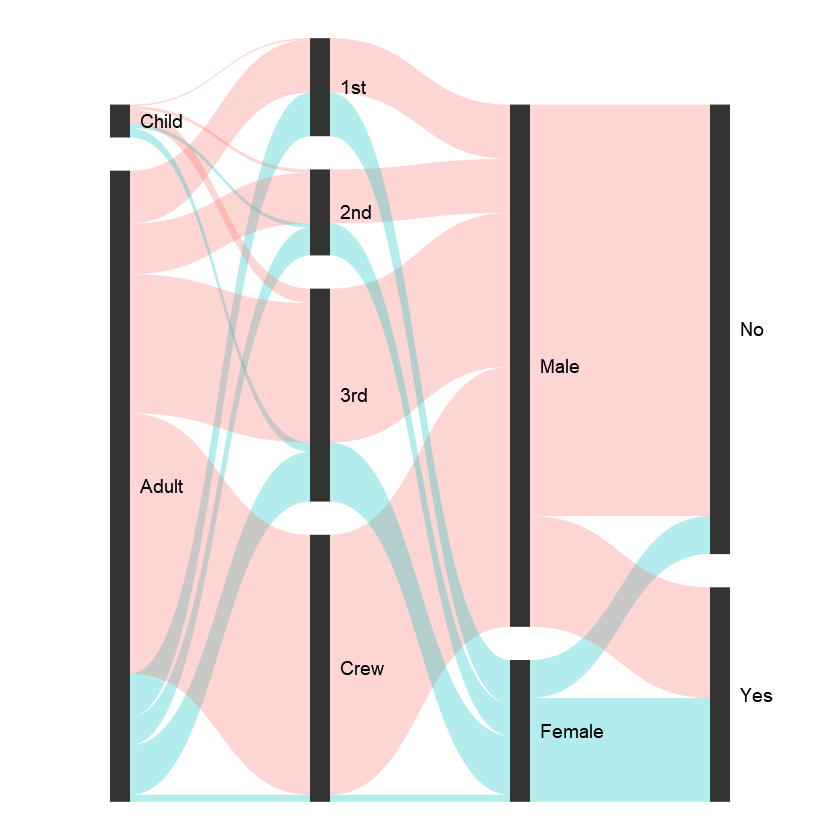

In [199]:
data.frame(Titanic) %>% gather_set_data(1:4) %>%
    ggplot(aes(x, id = id, split = y, value = Freq)) + 
    geom_parallel_sets(aes(fill = Sex), alpha = 0.3, axis.width = 0.1) + 
    geom_parallel_sets_axes(axis.width = 0.1) + 
    geom_parallel_sets_labels(colour = "black", angle = 0, nudge_x = 0.1, hjust = 0) + 
    guides(fill = "none") +  
    theme_void()

# 
# 
# 
# 

In [153]:
library(ggalluvial)

In [181]:
vaccinations %>% head

,survey,freq,subject,response,start_date,end_date
,<fct>,<int>,<int>,<fct>,<date>,<date>
1,ms153_NSA,48,1,Always,2010-09-22,2010-10-25
2,ms153_NSA,9,2,Always,2010-09-22,2010-10-25
3,ms153_NSA,66,3,Always,2010-09-22,2010-10-25
4,ms153_NSA,1,4,Always,2010-09-22,2010-10-25
5,ms153_NSA,11,5,Always,2010-09-22,2010-10-25
6,ms153_NSA,1,6,Always,2010-09-22,2010-10-25


In [193]:
colors <- hcl.colors(4, "Red-Blue")

Warning message in to_lodes_form(data = data, axes = axis_ind, discern = params$discern):
"Some strata appear at multiple axes."
Warning message in to_lodes_form(data = data, axes = axis_ind, discern = params$discern):
"Some strata appear at multiple axes."
Warning message in to_lodes_form(data = data, axes = axis_ind, discern = params$discern):
"Some strata appear at multiple axes."


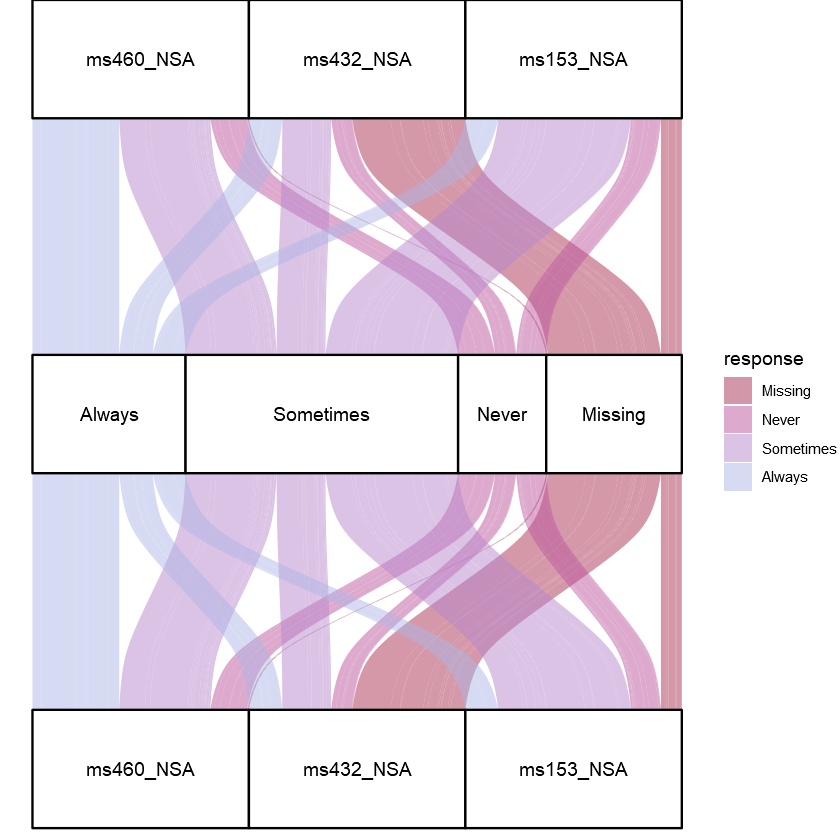

In [194]:
ggplot(data = vaccinations,
       aes(axis1 = survey, axis2 = response, axis3 = survey, y = freq)) +
    geom_alluvium(aes(fill = response)) +
    geom_stratum() +
    geom_text(stat = "stratum",
              aes(label = after_stat(stratum))) +
    scale_x_discrete(limits = c("Survey", "Response"),
                     expand = c(0.15, 0.05)) +
    scale_fill_manual(values = colors) + 
    theme_void() + 
    coord_flip()

# 
# 
# 
# 
https://r-charts.com/flow/sankey-diagram-ggplot2/

In [204]:
mtcars %>% make_tbl

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1
